In [1]:
# probability decision surface for logistic regression on a binary classification dataset
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

from sklearn.datasets import make_blobs


from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier


from matplotlib import pyplot as plt
plt.style.use('grayscale')

In [2]:
# generate dataset

n = 3

X, y = make_blobs(n_samples=100, centers=n, n_features=2, random_state=1, cluster_std=3)

#X, y = make_blobs(n_samples=[75, 25], centers=None, n_features=2,random_state=0)

In [3]:
y = y >= round(n / 2)
y = y.astype(int)

In [4]:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

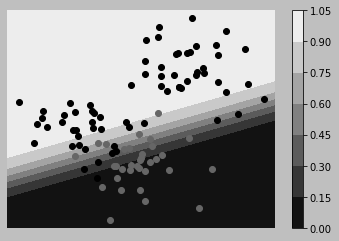

In [5]:
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# make predictions for the grid
Y_predict = model.predict_proba(grid)
# keep just the probabilities for class 0
Y_predict = Y_predict[:, 0]
# reshape the predictions back into a grid
zz = Y_predict.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='gray')
# add a legend, called a color bar
plt.colorbar(c)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='gray')
# show the plot
plt.axis('off')
plt.show()

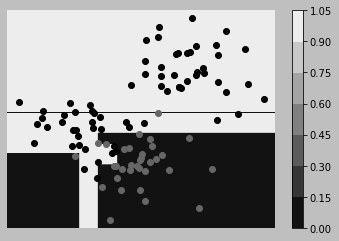

In [6]:
# define the model
model = tree.DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# make predictions for the grid
Y_predict = model.predict_proba(grid)
# keep just the probabilities for class 0
Y_predict = Y_predict[:, 0]
# reshape the predictions back into a grid
zz = Y_predict.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='gray')
# add a legend, called a color bar
plt.colorbar(c)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='gray')
# show the plot
plt.axis('off')
plt.show()


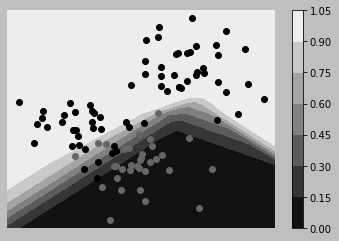

In [7]:
# define the model
model = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)
# fit the model
model.fit(X, y)
# make predictions for the grid
Y_predict = model.predict_proba(grid)
# keep just the probabilities for class 0
Y_predict = Y_predict[:, 0]
# reshape the predictions back into a grid
zz = Y_predict.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='gray')
# add a legend, called a color bar
plt.colorbar(c)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='gray')

# show the plot
plt.axis('off')
#plt.xlabel('Latitude')
#plt.ylabel('Longitude')
plt.show()